In [1]:
import glob
import joblib
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import sktime 
from sktime.datatypes._panel._convert import from_3d_numpy_to_nested

# Reading Data Files

In [4]:
# This method extract the necessary features from the destination folder
def data_reader_labels(loadPath, partitions, flare_label, ndimension = 3, binary=True):
    # Read files from the define path
    all_files = glob.glob(str(loadPath) + partitions + "/" + flare_label + "/*.csv")

    if flare_label == 'FL':
        # Iterate through the content in each file
        X_fl = []
        X_fl_label = []
        M_fl = []
        M_fl_label = []
        GroupBy = []
        
        for filename in all_files:
            # Extract flare labels from the file name
            tag = filename.split('@')[0]
            tag = tag.split('/')[-1]
            LABEL = tag.split('_ar')[0]

            # Read the file and extract necessary features
            df = pd.read_csv(filename, index_col=None, header=0, sep='\t')
            df = df[['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ',"TOTPOT",
                    "TOTUSJZ"]]
            
            # If we want to get the whole distribution in 2D array
            if ndimension == 2:
                for (index, row) in df.iterrows():
                    if LABEL.startswith('X'):
                        X_fl.append(row)
                        X_fl_label.append(1)
                        GroupBy.append(filename)
                    if LABEL.startswith('M'):
                        M_fl.append(row)
                        M_fl_label.append(1)
                        GroupBy.append(filename)
            else:
                row_lst = []
                for (index, row) in df.iterrows():
                    row_lst.append(row.tolist())
    
                if LABEL.startswith('X'):
                    X_fl.append(row_lst)
                    X_fl_label.append(1)
                    GroupBy.append(partitions)
                if LABEL.startswith('M'):
                    M_fl.append(row_lst)
                    M_fl_label.append(1)
                    GroupBy.append(partitions)

        # Return the 3D array (a, b, c) corresponding to (num of total record, timestamps, dimension/parameters)
        return np.array(M_fl), np.array(M_fl_label), np.array(X_fl), np.array(X_fl_label), np.array(GroupBy)

    elif flare_label == 'NF':
        # Iterate through the content in each file
        C_nf = []
        C_nf_label = []
        B_nf = []
        B_nf_label = []
        FQ_nf = []
        FQ_nf_label = []
        GroupByNf = []
        
        for filename in all_files:
            # Extract flare labels from the file name
            tag = filename.split('@')[0]
            tag = tag.split('/')[-1]
            LABEL = tag.split('_ar')[0]

            # Read the file and extract necessary features
            df = pd.read_csv(filename, index_col=None, header=0, sep='\t')
            df = df[['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ',"TOTPOT",
                    "TOTUSJZ"]]
            
            if ndimension == 2:
                    
                    for (index, row) in df.iterrows():        
                        if LABEL.startswith('C'):
                            C_nf.append(row)
                            C_nf_label.append(0)
                            GroupByNf.append(filename)
                        if LABEL.startswith('B'):
                            B_nf.append(row)
                            B_nf_label.append(0)
                            GroupByNf.append(filename)
                        if LABEL.startswith('FQ'):
                            FQ_nf.append(row)
                            FQ_nf_label.append(0)
                            GroupByNf.append(filename)
            else:                
                row_lst = []
                for (index, row) in df.iterrows():
                    row_lst.append(row.tolist())
    
                if LABEL.startswith('C'):
                    C_nf.append(row_lst)
                    C_nf_label.append(0)
                    GroupByNf.append(partitions)
                if LABEL.startswith('B'):
                    B_nf.append(row_lst)
                    B_nf_label.append(0)
                    GroupByNf.append(partitions)
                if LABEL.startswith('FQ'):
                    FQ_nf.append(row_lst)
                    FQ_nf_label.append(0)
                    GroupByNf.append(partitions)

        # Return the 2D (count, parameters) or
        # 3D array (a, b, c) corresponding to (num of total record, timestamps, dimension/parameters)
        return np.array(B_nf), np.array(B_nf_label), np.array(C_nf), np.array(C_nf_label), np.array(FQ_nf), np.array(
            FQ_nf_label), np.array(GroupByNf)

In [5]:
path="/data/SHARPS/BERKAY/v0.7/CLUS/"

# Get Partition 1 in 3D matrix 
M_FL_values,M_FL_target,X_FL_values,X_FL_target, Group=data_reader_labels(path,"partition1","FL",3)
B_NF_values,B_NF_target,C_NF_values,C_NF_target,FQ_NF_values,FQ_NF_target, Group=data_reader_labels(path,"partition1","NF",3)

# Get Partition 2 in 3D matrix
M_FL_values2,M_FL_target2,X_FL_values2,X_FL_target2, Group2=data_reader_labels(path,"partition2","FL",3)
B_NF_values2,B_NF_target2,C_NF_values2,C_NF_target2,FQ_NF_values2,FQ_NF_target2, GroupNF2=data_reader_labels(path,"partition2","NF",3)

# Get Partition 3 in 3D matrix
M_FL_values3,M_FL_target3,X_FL_values3,X_FL_target3, Group3=data_reader_labels(path,"partition3","FL",3)
B_NF_values3,B_NF_target3,C_NF_values3,C_NF_target3,FQ_NF_values3,FQ_NF_target3, GroupNF3=data_reader_labels(path,"partition3","NF",3)

In [6]:
# By passing two in ndimension parameters we can get two-dimensional array of whole distribution for each flare class

# Get Partition 1 in 2D matrix
M_FL_values_tab,M_FL_target_tab,X_FL_values_tab,X_FL_target_tab, Group_tab=data_reader_labels(path,"partition1","FL", 2)
B_NF_values_tab,B_NF_target_tab,C_NF_values_tab,C_NF_target_tab,FQ_NF_values_tab,FQ_NF_target_tab, GroupNF_tab=data_reader_labels(path,"partition1","NF", 2)

# Get Partition 2 in 2D matrix
M_FL_values2_tab, M_FL_target2_tab, X_FL_values2_tab, X_FL_target2_tab, Group_tab2=data_reader_labels(path,"partition2","FL", 2)
B_NF_values2_tab, B_NF_target2_tab, C_NF_values2_tab, C_NF_target2_tab, FQ_NF_values2_tab, FQ_NF_target2_tab, GroupNF2_tab=data_reader_labels(path,"partition2","NF", 2)

# Get Partition 3 in 2D matrix 
M_FL_values3_tab, M_FL_target3_tab, X_FL_values3_tab, X_FL_target3_tab, Group_tab3=data_reader_labels(path,"partition3","FL", 2)
B_NF_values3_tab, B_NF_target3_tab, C_NF_values3_tab, C_NF_target3_tab, FQ_NF_values3_tab, FQ_NF_target3_tab, GroupNF3_tab=data_reader_labels(path,"partition3","NF", 2)

In [7]:
data_array_mix = np.concatenate((M_FL_values,X_FL_values,B_NF_values,C_NF_values,FQ_NF_values,
                                 M_FL_values2,X_FL_values2,B_NF_values2,C_NF_values2,FQ_NF_values2,
                                 M_FL_values3,X_FL_values3,B_NF_values3,C_NF_values3,FQ_NF_values3))

target_array_mix = np.concatenate((M_FL_target,X_FL_target,B_NF_target,C_NF_target,FQ_NF_target,
                                   M_FL_target2,X_FL_target2,B_NF_target2,C_NF_target2,FQ_NF_target2,
                                   M_FL_target3,X_FL_target3,B_NF_target3,C_NF_target3,FQ_NF_target3))

data_array_mix_tab = np.concatenate((M_FL_values_tab,X_FL_values_tab,B_NF_values_tab,C_NF_values_tab,FQ_NF_values_tab,
                                     M_FL_values2_tab,X_FL_values2_tab,B_NF_values2_tab,C_NF_values2_tab,FQ_NF_values2_tab,
                                     M_FL_values3_tab,X_FL_values3_tab,B_NF_values3_tab,C_NF_values3_tab,FQ_NF_values3_tab))

target_array_mix_tab = np.concatenate((M_FL_target_tab,X_FL_target_tab,B_NF_target_tab,C_NF_target_tab,FQ_NF_target_tab,
                                      M_FL_target2_tab,X_FL_target2_tab,B_NF_target2_tab,C_NF_target2_tab,FQ_NF_target2_tab,
                                      M_FL_target3_tab,X_FL_target3_tab,B_NF_target3_tab,C_NF_target3_tab,FQ_NF_target3_tab))


In [8]:
features=['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ']

In [9]:
## Summary Stastics for our dataset
stat_ls = []
for i in range(0,data_array_mix.shape[0]):
    df = pd.DataFrame(data_array_mix[i, :, :], columns = features)
    summary_df_cont=pd.DataFrame()
    for names in features:
        temp_df=pd.DataFrame()
        temp_df["Feature"]=[names]
        temp_df["Null_Values"]=[df[names].isnull().sum()]
        temp_df["Min"]=[df[names].min()]
        temp_df["Max"]=[df[names].max()]
        temp_df["Mean"]=[df[names].mean()]
        temp_df["Std.Dev"]=[df[names].std()]
        summary_df_cont=pd.concat([summary_df_cont,temp_df])
        
    row_lst=[]
    for (index, row) in summary_df_cont.iterrows():
        row_lst.append(row[1:].tolist())
    
    stat_ls.append(row_lst)

stat_array=np.array(stat_ls)

In [11]:
df_tab = pd.DataFrame(data_array_mix_tab, columns = features)
df_tab

,USFLUX,TOTUSJH,ABSNJZH,SAVNCPP,TOTBSQ,TOTPOT,TOTUSJZ
0,6.499284e+22,3948.598770,180.722345,8.038467e+12,5.511007e+10,7.826781e+23,7.948180e+13
1,6.482391e+22,3948.485756,196.561268,9.172823e+12,5.508232e+10,7.888169e+23,7.966682e+13
2,6.459417e+22,3993.967923,228.126634,1.052872e+13,5.490992e+10,7.851836e+23,8.090430e+13
3,6.427287e+22,3976.729991,212.682855,9.130316e+12,5.467321e+10,7.796718e+23,8.061778e+13
4,6.391565e+22,3947.605468,238.184791,1.078541e+13,5.455316e+10,7.817119e+23,8.051822e+13
...,...,...,...,...,...,...,...
1812955,8.717578e+19,6.722438,0.661112,1.779674e+10,4.850879e+07,2.568253e+20,1.423898e+11
1812956,6.746567e+19,5.483812,1.381970,1.444667e+11,3.800122e+07,2.259356e+20,1.134872e+11
1812957,7.673658e+19,6.340702,2.016948,1.623141e+11,4.346522e+07,2.097976e+20,1.340101e+11
1812958,9.139222e+19,7.548363,1.222996,1.160917e+11,5.180350e+07,2.425642e+20,1.505102e+11


In [12]:
null_count_ls=[]
min_ls=[]
max_ls=[]
avg_ls=[]
std_ls=[]
avg_std_ls=[]
distrib_std=[]
first_quant=[]
median=[]
third_quant=[]

for (i, feature) in enumerate(features):
    null_count_ls.append(sum(stat_array[:,i,0]))
    min_ls.append(min(stat_array[:,i,1]))
    max_ls.append(max(stat_array[:,i,2]))
    avg_ls.append(np.mean(stat_array[:,i,3]))
    avg_std_ls.append(np.mean(stat_array[:, i, 4]))
    std_ls.append(np.std(stat_array[:, i, 4]))
    distrib_std.append(np.std(df_tab[feature]))
    first_quant.append(df_tab[feature].quantile(.25))
    median.append(df_tab[feature].quantile(.75))
    third_quant.append(df_tab[feature].quantile(.55))

In [13]:
Summary_stat_df=pd.DataFrame()
Summary_stat_df["Feature"]=features
Summary_stat_df["Nulls Count"]=null_count_ls
Summary_stat_df["Min"]=min_ls
Summary_stat_df["Max"]=max_ls
Summary_stat_df["Avg Mean"]=avg_ls
Summary_stat_df["Avg Std Dev"] = avg_std_ls
Summary_stat_df["Std of Std Dev"] = std_ls
Summary_stat_df["Std Dev of Distrib"] = distrib_std
Summary_stat_df["Q1"] = first_quant
Summary_stat_df["Median"] = median
Summary_stat_df["Q3"] = third_quant

In [14]:
Summary_stat_df

,Feature,Nulls Count,Min,Max,Avg Mean,Avg Std Dev,Std of Std Dev,Std Dev of Distrib,Q1,Median,Q3
0,USFLUX,4712.0,0.0,1.298067e+23,1.102793e+22,4.812524e+20,6.586893e+20,1.744321e+22,6.222610e+20,1.433425e+22,4.297629e+21
1,TOTUSJH,4712.0,0.0,1.152325e+04,8.093433e+02,3.825365e+01,5.643826e+01,1.382917e+03,4.160085e+01,9.529028e+02,2.710965e+02
2,ABSNJZH,4712.0,0.0,2.980218e+03,1.107824e+02,1.667655e+01,2.804408e+01,2.730961e+02,3.141913e+00,7.824690e+01,1.811220e+01
3,SAVNCPP,4712.0,0.0,1.085462e+14,4.648434e+12,8.838382e+11,1.243316e+12,1.007075e+13,2.772390e+11,3.970191e+12,1.312702e+12
4,TOTBSQ,4712.0,0.0,1.431918e+11,1.108083e+10,3.882663e+08,6.557893e+08,2.045840e+10,3.200768e+08,1.274459e+10,2.772911e+09
5,TOTPOT,4712.0,0.0,8.684370e+26,1.976124e+23,2.774457e+22,1.096261e+24,1.320571e+24,2.246169e+21,1.813834e+23,2.290849e+22
6,TOTUSJZ,4712.0,0.0,2.833974e+14,1.584594e+13,8.623452e+11,1.178739e+12,2.518471e+13,9.312461e+11,1.983504e+13,5.838776e+12


In [15]:
data_array_fl = np.concatenate((M_FL_values_tab, M_FL_values2_tab, M_FL_values3_tab, X_FL_values_tab,
                                                                   X_FL_values2_tab, X_FL_values3_tab))
data_array_nonfl = np.concatenate((B_NF_values_tab, B_NF_values2_tab, B_NF_values3_tab, C_NF_values_tab, C_NF_values2_tab,
                                   C_NF_values3_tab, FQ_NF_values_tab, FQ_NF_values2_tab, FQ_NF_values3_tab))

df_fl = pd.DataFrame(data_array_fl, columns = features)
df_non_fl = pd.DataFrame(data_array_nonfl, columns = features)

In [16]:
df_fl

,USFLUX,TOTUSJH,ABSNJZH,SAVNCPP,TOTBSQ,TOTPOT,TOTUSJZ
0,6.499284e+22,3948.598770,180.722345,8.038467e+12,5.511007e+10,7.826781e+23,7.948180e+13
1,6.482391e+22,3948.485756,196.561268,9.172823e+12,5.508232e+10,7.888169e+23,7.966682e+13
2,6.459417e+22,3993.967923,228.126634,1.052872e+13,5.490992e+10,7.851836e+23,8.090430e+13
3,6.427287e+22,3976.729991,212.682855,9.130316e+12,5.467321e+10,7.796718e+23,8.061778e+13
4,6.391565e+22,3947.605468,238.184791,1.078541e+13,5.455316e+10,7.817119e+23,8.051822e+13
...,...,...,...,...,...,...,...
244735,3.490092e+22,3307.077268,678.904006,1.582902e+13,4.334809e+10,8.391941e+23,6.494077e+13
244736,3.498010e+22,3339.387606,682.431876,1.478209e+13,4.342240e+10,8.427707e+23,6.528689e+13
244737,3.472742e+22,3322.296327,677.861506,1.449737e+13,4.322371e+10,8.379377e+23,6.403715e+13
244738,3.494740e+22,3349.258534,710.562929,1.609791e+13,4.338728e+10,8.401190e+23,6.491618e+13


In [17]:
# Constructing a dataframe with corresponding classes and target labeleing
# It is important to use indexes in order we concatenate the ndarrays

# Partition 1 

df_M = pd.DataFrame(data = M_FL_values_tab, 
                  columns = features)

df_X = pd.DataFrame(data = X_FL_values_tab, 
                  columns = features)

df_B = pd.DataFrame(data = B_NF_values_tab, 
                  columns = features)

df_C = pd.DataFrame(data = C_NF_values_tab, 
                  columns = features)

df_FQ = pd.DataFrame(data = FQ_NF_values_tab, 
                  columns = features)

# Partition 2 

df_M2 = pd.DataFrame(data = M_FL_values2_tab, 
                  columns = features)

df_X2 = pd.DataFrame(data = X_FL_values2_tab, 
                  columns = features)

df_B2 = pd.DataFrame(data = B_NF_values2_tab, 
                  columns = features)

df_C2 = pd.DataFrame(data = C_NF_values2_tab, 
                  columns = features)

df_FQ2 = pd.DataFrame(data = FQ_NF_values2_tab, 
                  columns = features)


# Partition 3

df_M3 = pd.DataFrame(data = M_FL_values3_tab, 
                  columns = features)

df_X3 = pd.DataFrame(data = X_FL_values3_tab, 
                  columns = features)

df_B3 = pd.DataFrame(data = B_NF_values3_tab, 
                  columns = features)

df_C3 = pd.DataFrame(data = C_NF_values3_tab, 
                  columns = features)

df_FQ3 = pd.DataFrame(data = FQ_NF_values3_tab, 
                  columns = features)

df_M['class'] = 'M'
df_X['class'] = 'X'
df_B['class'] = 'B'
df_C['class'] = 'C'
df_FQ['class'] = 'FQ'

df_M2['class'] = 'M'
df_X2['class'] = 'X'
df_B2['class'] = 'B'
df_C2['class'] = 'C'
df_FQ2['class'] = 'FQ'

df_M3['class'] = 'M'
df_X3['class'] = 'X'
df_B3['class'] = 'B'
df_C3['class'] = 'C'
df_FQ3['class'] = 'FQ'

df_classes = pd.concat([df_M, df_X, df_B, df_C, df_FQ, df_M2, df_X2, df_B2, df_C2, df_FQ2,
                       df_M3, df_X3, df_B3, df_C3, df_FQ3], ignore_index=True)
df_classes['target'] = 0
df_classes.loc[(df_classes['class'] == 'M') | (df_classes['class'] == 'X'), 'target'] = 1
group_tab_by = np.concatenate((Group_tab, GroupNF_tab, Group_tab2, GroupNF2_tab, Group_tab3, GroupNF3_tab))
df_classes['group'] = pd.DataFrame(group_tab_by)

# Plotting Distributions

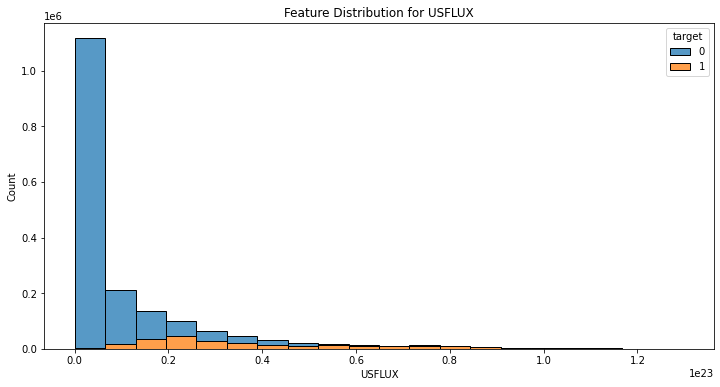

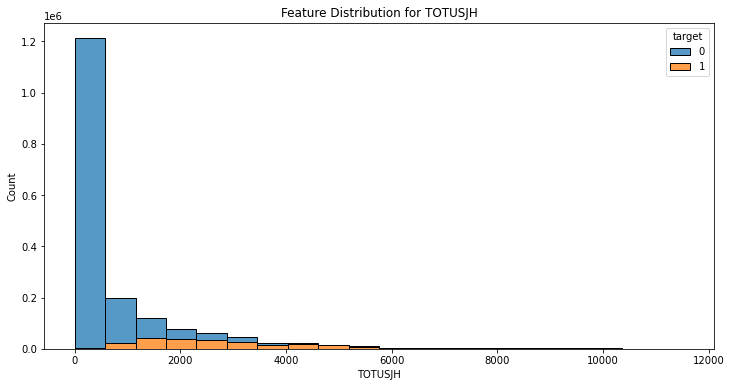

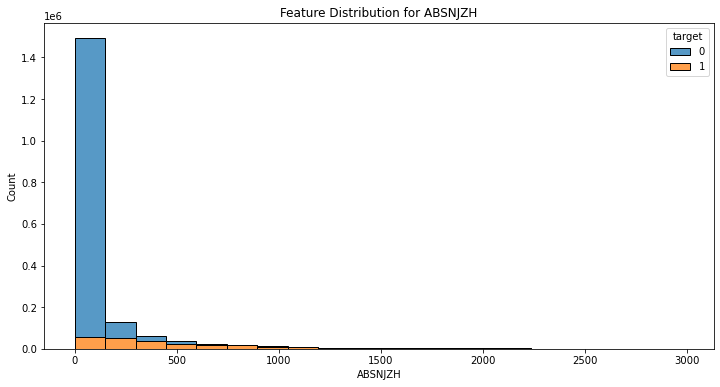

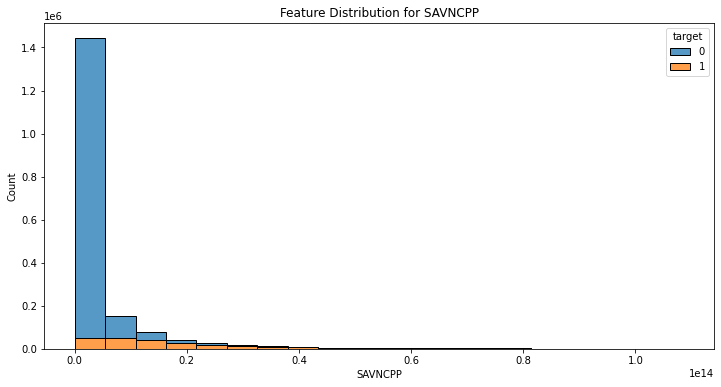

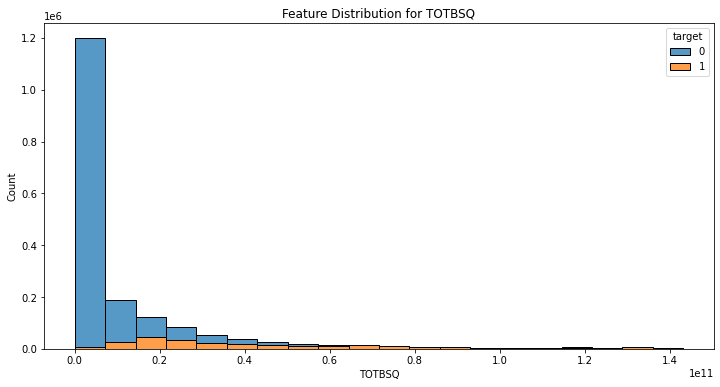

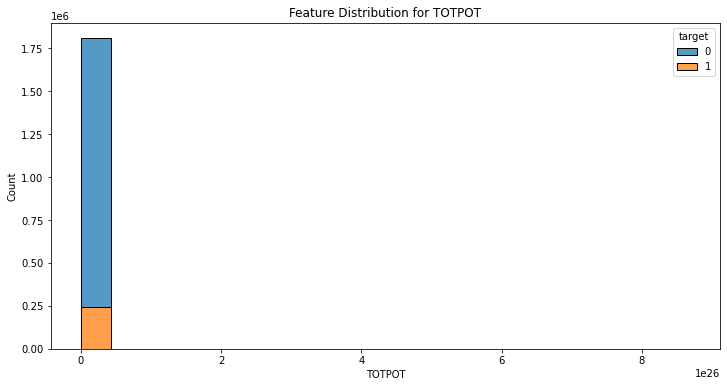

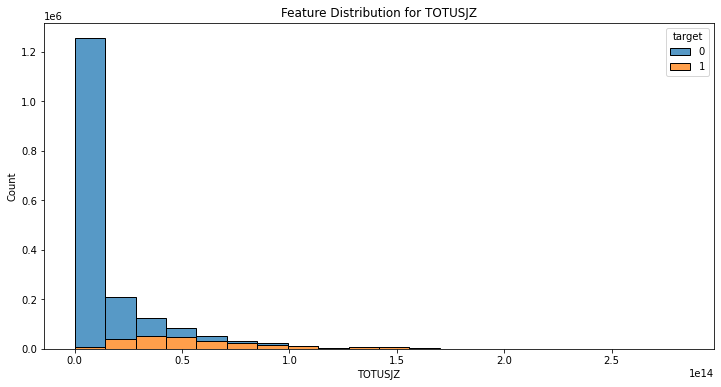

In [59]:
for name in df_classes[features].columns:
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    #sns.color_palette("Set2")
    sns.histplot(data = df_classes, x = name,multiple="stack",
                 bins=20,hue="target").set_title("Feature Distribution for"+ " " + name)
    
    

In [19]:
mean_ls=[]
std_ls=[]
for i in range(0,stat_array.shape[1]):
    mean_ls.append(stat_array[:,i,3])
    std_ls.append(stat_array[:,i,4])

In [20]:
mean_df=pd.DataFrame()
for i in range(0,stat_array.shape[1]):
    mean_df[features[i]]=mean_ls[i]
mean_df["Flare_Target"]  = target_array_mix

In [21]:
std_df=pd.DataFrame()
for i in range(0,stat_array.shape[1]):
    std_df[features[i]]=std_ls[i]
std_df["Flare_Target"]  = target_array_mix

/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


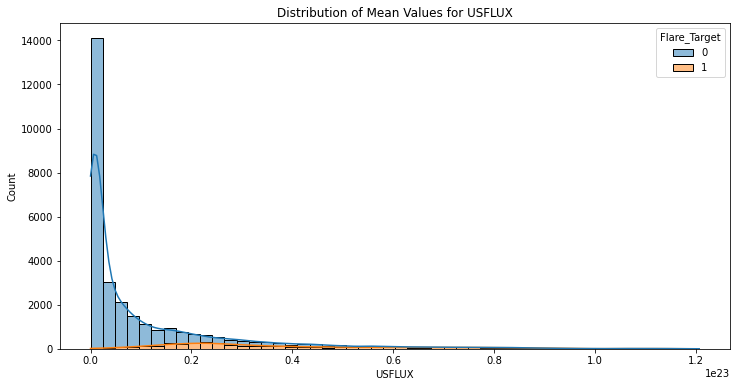

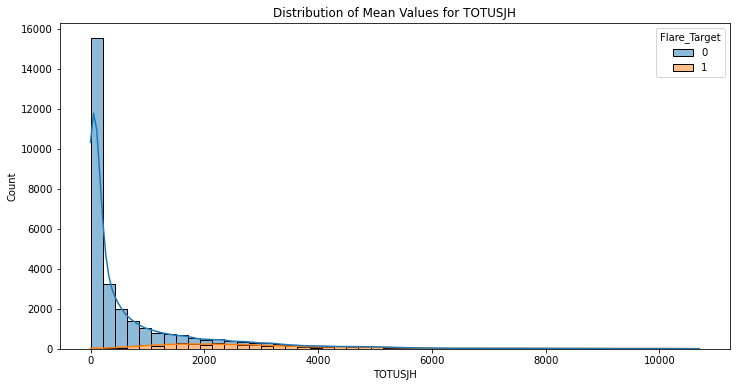

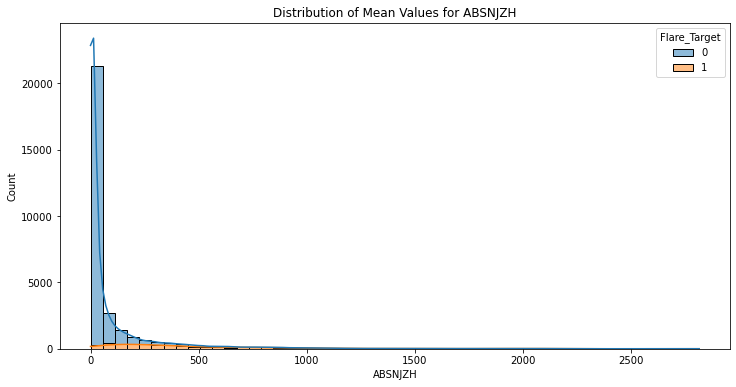

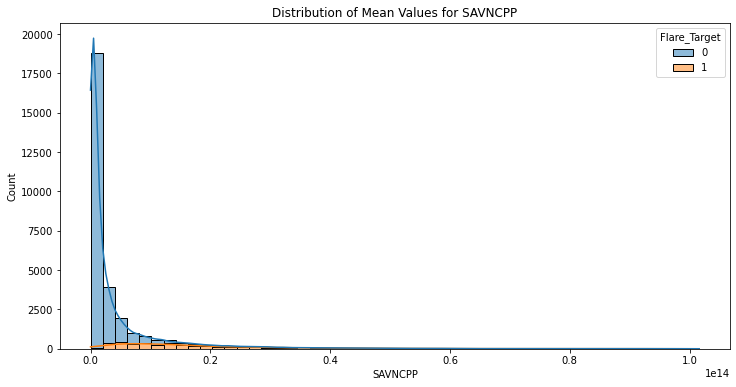

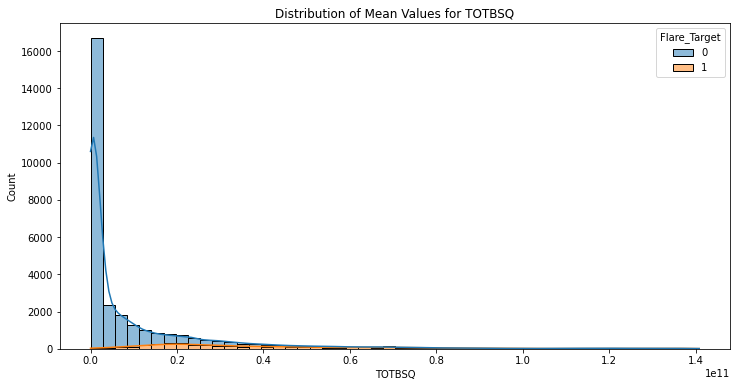

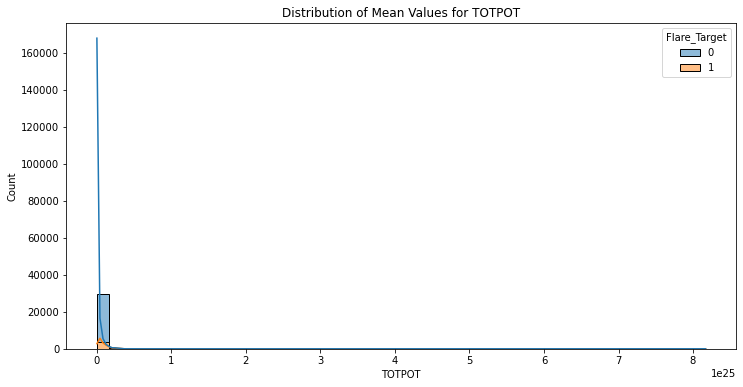

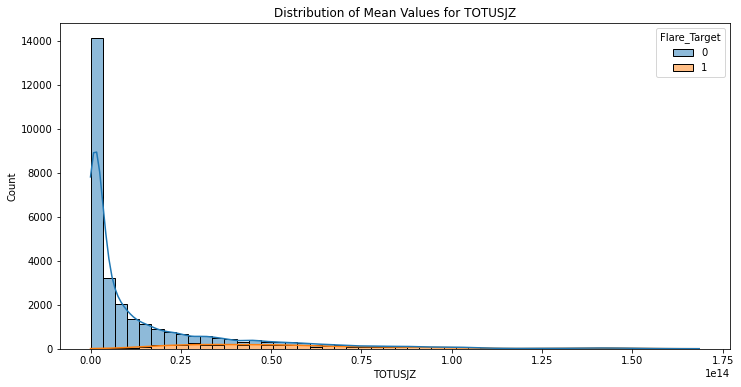

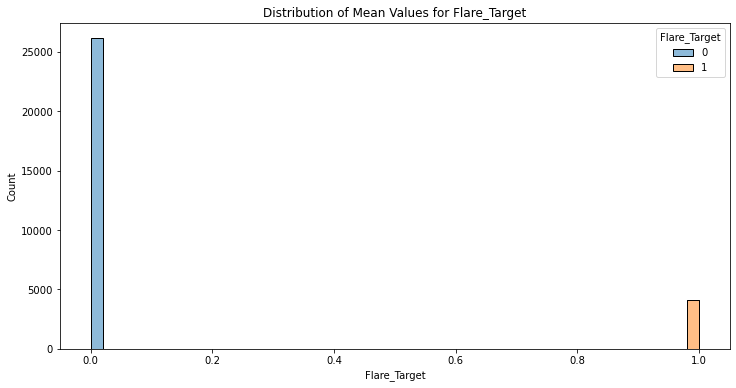

In [65]:
for name in mean_df.columns:
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    sns.histplot(data=mean_df, x=name, multiple="stack",
                 kde=True,bins=50,hue="Flare_Target").set_title("Distribution of Mean Values for"+ " " + name)

/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/lib/anaconda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


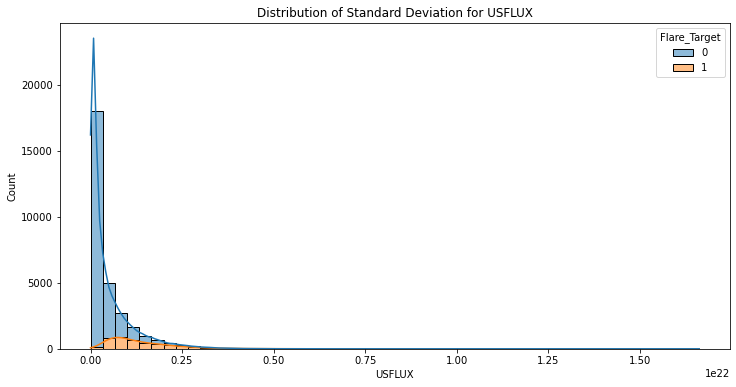

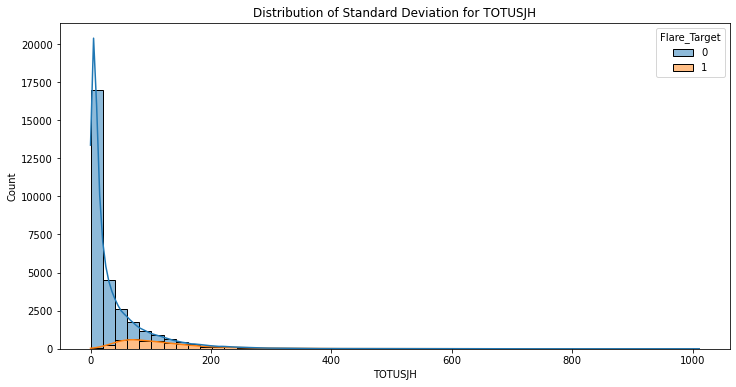

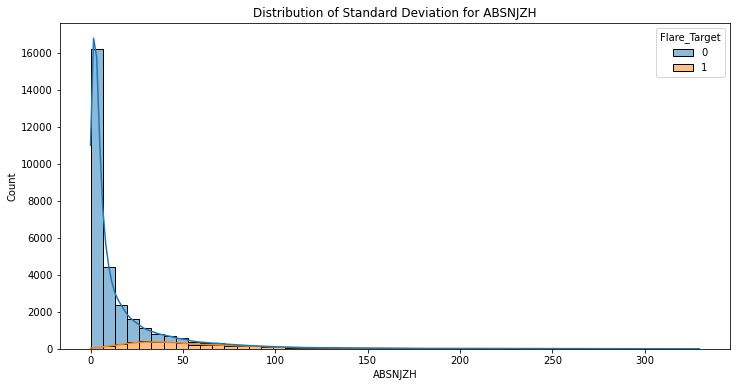

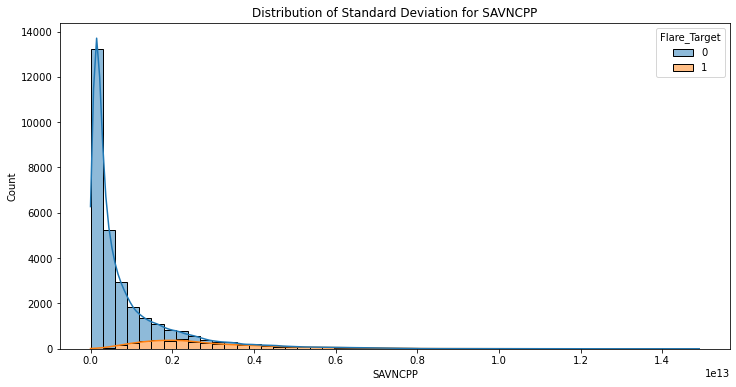

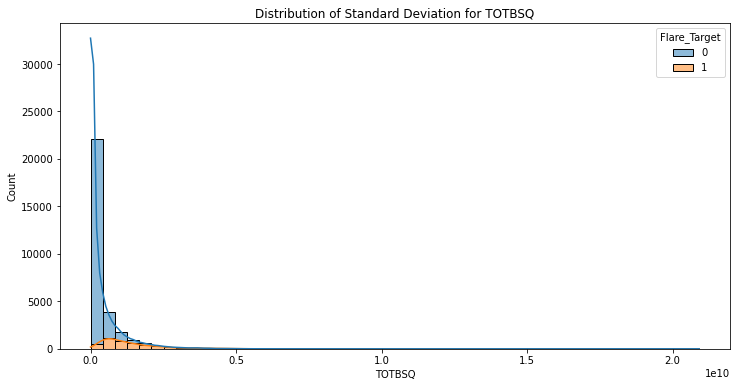

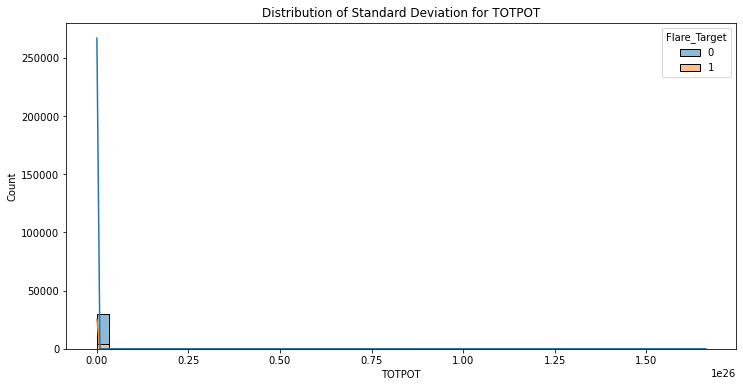

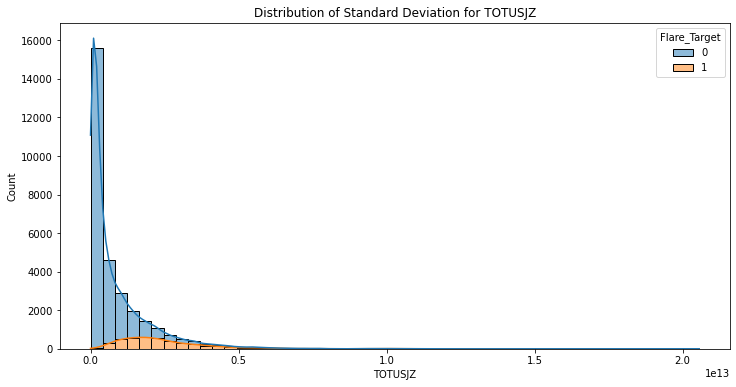

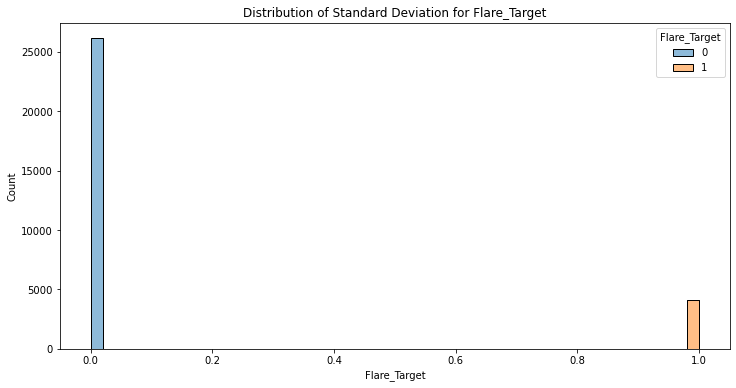

In [61]:
for name in std_df.columns:
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    sns.histplot(data=std_df, x=name, multiple="stack",
                 kde=True,bins=50,hue="Flare_Target").set_title("Distribution of Standard Deviation for"+ " " + name)

In [ ]:
features=['USFLUX', 'TOTUSJH', 'ABSNJZH', 'SAVNCPP', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ']

In [33]:
data_ls = []
for i in range(0,data_array_mix.shape[0]):
    df = pd.DataFrame(data_array_mix[i,:,:], columns = features)
    
    # Filling Null values using linear interpolation
    
    df.interpolate(method='linear', axis=0, limit_direction='both', inplace=True)

    row_lst=[]
    for (index, row) in df.iterrows():
        row_lst.append(row.tolist())
    
    data_ls.append(row_lst)
    
final_array_data=np.array(data_ls)  

In [51]:
#We are using Standard Scaler to normalize the data on individual instances 
list_norm_data=[]
from sklearn.preprocessing import StandardScaler
for  i in range(0,final_array_data.shape[0]):
    data_norma = pd.DataFrame(final_array_data[i,:,:], columns = features)
    scaler = preprocessing.StandardScaler()
    scaled = scaler.fit_transform(data_norma)
    data_scaled = pd.DataFrame(data=scaled, columns=features)
    
    norm_ls=[]
    for (index, row) in data_scaled.iterrows():
        norm_ls.append(row.tolist())
    
    list_norm_data.append(norm_ls)
    
final_array_norm=np.array(list_norm_data)  
    

In [39]:
final_df=from_3d_numpy_to_nested(final_array_data.swapaxes(1,2), column_names=features, cells_as_numpy=False)
final_df["Target"]=target_array_mix

In [42]:
final_df

,USFLUX,TOTUSJH,ABSNJZH,SAVNCPP,TOTBSQ,TOTPOT,TOTUSJZ,Target
0,0 6.499284e+22 1 6.482391e+22 2 6....,0 3948.598770 1 3948.485756 2 3993...,0 180.722345 1 196.561268 2 228.12...,0 8.038467e+12 1 9.172823e+12 2 1....,0 5.511007e+10 1 5.508232e+10 2 5....,0 7.826781e+23 1 7.888169e+23 2 7....,0 7.948180e+13 1 7.966682e+13 2 8....,1
1,0 2.048862e+22 1 2.035425e+22 2 2....,0 1832.189161 1 1822.038319 2 1823...,0 57.873728 1 71.677487 2 56.09...,0 9.661905e+12 1 9.225191e+12 2 8....,0 2.031790e+10 1 2.022157e+10 2 2....,0 3.633399e+23 1 3.628075e+23 2 3....,0 4.170312e+13 1 4.117412e+13 2 4....,1
2,0 1.635331e+22 1 1.628852e+22 2 1....,0 972.192133 1 956.465485 2 960.92...,0 133.000377 1 138.407592 2 132.14...,0 2.790539e+12 1 2.368424e+12 2 3....,0 1.456621e+10 1 1.453914e+10 2 1....,0 2.292432e+23 1 2.277908e+23 2 2....,0 2.053599e+13 1 2.004484e+13 2 2....,1
3,0 4.854274e+22 1 4.874232e+22 2 4....,0 3958.624542 1 4062.845727 2 4053...,0 672.665536 1 691.311500 2 721.05...,0 4.502288e+13 1 4.517309e+13 2 4....,0 6.045770e+10 1 6.059242e+10 2 6....,0 1.154610e+24 1 1.157003e+24 2 1....,0 7.653851e+13 1 7.829640e+13 2 7....,1
4,0 2.047216e+22 1 2.059660e+22 2 2....,0 1873.556961 1 1888.526741 2 1855...,0 59.804189 1 37.324194 2 29.11030...,0 7.269096e+12 1 7.452472e+12 2 8....,0 2.134141e+10 1 2.135078e+10 2 2....,0 3.686462e+23 1 3.677807e+23 2 3....,0 3.933330e+13 1 4.012606e+13 2 3....,1
...,...,...,...,...,...,...,...,...
30211,0 1.783551e+20 1 1.841240e+20 2 1....,0 19.065959 1 20.550816 2 17.45164...,0 1.602669 1 0.957442 2 0.712909 3...,0 1.572076e+11 1 3.362028e+11 2 1....,0 1.138982e+08 1 1.133597e+08 2 9....,0 5.138163e+20 1 5.235942e+20 2 4....,0 3.420614e+11 1 3.725822e+11 2 3....,0
30212,0 1.122531e+22 1 1.136676e+22 2 1....,0 839.883610 1 866.407096 2 859.79...,0 117.581056 1 130.944665 2 137.18...,0 8.328680e+12 1 1.028916e+13 2 1....,0 1.270985e+10 1 1.285622e+10 2 1....,0 2.410643e+23 1 2.446229e+23 2 2....,0 2.047674e+13 1 2.108169e+13 2 2....,0
30213,0 5.902036e+20 1 5.627950e+20 2 5....,0 48.758620 1 48.549424 2 47.67839...,0 2.631544 1 6.116194 2 6.64706...,0 4.959456e+11 1 5.929301e+11 2 4....,0 3.629763e+08 1 3.539008e+08 2 3....,0 2.641596e+21 1 2.506298e+21 2 2....,0 1.030154e+12 1 9.594329e+11 2 9....,0
30214,0 1.147825e+21 1 1.148240e+21 2 1....,0 57.285378 1 59.754253 2 57.99948...,0 7.229205 1 5.286139 2 4.62581...,0 5.833261e+11 1 4.457785e+11 2 4....,0 5.318851e+08 1 5.297777e+08 2 5....,0 4.064053e+21 1 4.067645e+21 2 3....,0 1.390044e+12 1 1.426808e+12 2 1....,0


In [60]:
final_df_norm=from_3d_numpy_to_nested(final_array_norm.swapaxes(1,2), column_names=features, cells_as_numpy=False)
final_df_norm["Target"]=target_array_mix

In [61]:
final_df_norm

,USFLUX,TOTUSJH,ABSNJZH,SAVNCPP,TOTBSQ,TOTPOT,TOTUSJZ,Target
0,0 2.325309 1 2.257020 2 2.164150 3...,0 1.809717 1 1.808893 2 2.140524 3...,0 -2.317018 1 -1.986666 2 -1.328308 3...,0 -2.104703 1 -1.660123 2 -1.128717 3...,0 2.557658 1 2.536412 2 2.404457 3...,0 2.034211 1 2.430360 2 2.195896 3...,0 1.437631 1 1.495962 2 1.886092 3...,1
1,0 -0.327391 1 -0.522681 2 -0.561586 3...,0 -0.695613 1 -0.831659 2 -0.812206 3...,0 -0.089806 1 0.407367 2 -0.153797 3...,0 0.926177 1 0.436984 2 -0.180986 3...,0 -1.472919 1 -1.626146 2 -1.713289 3...,0 -0.957924 1 -1.022498 2 -0.831049 3...,0 0.663321 1 0.386805 2 0.189967 3...,1
2,0 1.279723 1 1.195499 2 1.263750 3...,0 2.098368 1 1.454472 2 1.636940 3...,0 0.482595 1 0.873346 2 0.420986 3...,0 1.794760 1 1.172155 2 2.290417 3...,0 1.015588 1 0.927033 2 0.890572 3...,0 0.316325 1 -0.059308 2 -0.203118 3...,0 2.729711 1 2.027610 2 2.223843 3...,1
3,0 -2.229260 1 -2.138408 2 -2.089686 3...,0 -1.474491 1 -0.783034 2 -0.843511 3...,0 -1.187571 1 -0.846622 2 -0.302719 3...,0 -0.801030 1 -0.766697 2 -0.143573 3...,0 -1.580123 1 -1.493743 2 -1.506993 3...,0 -0.797485 1 -0.671026 2 -0.609521 3...,0 -1.666826 1 -0.820853 2 -0.733178 3...,1
4,0 1.123380 1 1.197733 2 1.186214 3...,0 1.096648 1 1.227370 2 0.943277 3...,0 2.428347 1 0.921478 2 0.370888 3...,0 -0.806662 1 -0.641252 2 -0.060963 3...,0 1.624315 1 1.631743 2 1.596815 3...,0 1.786427 1 1.725552 2 1.809404 3...,0 0.642283 1 0.906780 2 0.657050 3...,1
...,...,...,...,...,...,...,...,...
30211,0 1.696444 1 1.917201 2 1.191068 3...,0 1.857143 1 2.322095 2 1.351653 3...,0 0.328172 1 -0.302259 2 -0.541185 3...,0 -0.093336 1 1.748660 2 0.125931 3...,0 2.416756 1 2.381196 2 1.377450 3...,0 2.179502 1 2.328447 2 1.561117 3...,0 1.482202 1 2.024310 2 1.244903 3...,0
30212,0 -2.876099 1 -2.034231 2 -1.790196 3...,0 -1.823599 1 -1.134019 2 -1.305890 3...,0 -1.815695 1 -1.030319 2 -0.663786 3...,0 -1.898401 1 -0.160733 2 0.186851 3...,0 -0.949728 1 -0.446239 2 -0.340347 3...,0 0.393962 1 0.812046 2 0.485696 3...,0 -0.335460 1 0.332421 2 -0.103801 3...,0
30213,0 2.155847 1 1.853882 2 1.793171 3...,0 1.237016 1 1.212662 2 1.111261 3...,0 -1.701702 1 -0.212497 2 0.014375 3...,0 0.663951 1 1.307760 2 0.408522 3...,0 1.870364 1 1.735806 2 1.649660 3...,0 1.952022 1 1.648637 2 1.392252 3...,0 2.120259 1 1.613975 2 1.459005 3...,0
30214,0 -0.915769 1 -0.912835 2 -1.075617 3...,0 -0.945187 1 -0.162984 2 -0.718940 3...,0 0.701469 1 -0.103340 2 -0.376843 3...,0 0.868531 1 0.054291 2 -0.015583 3...,0 -0.997788 1 -1.045726 2 -1.171345 3...,0 0.822467 1 0.844878 2 0.403535 3...,0 -0.687771 1 -0.290261 2 -0.450709 3...,0


# Reading our Prepared data into .ts file

In [44]:
from sktime.utils.data_io import write_dataframe_to_tsfile
#from sktime.utils.data_io import write_ndarray_to_tsfile
write_dataframe_to_tsfile(final_df[features],"MVTS_Data_Updated",problem_name="MVTS_flares_data_updated",
    class_label=[0,1],
    class_value_list=final_df["Target"],
    equal_length=True,
    series_length=60,
    missing_values="NaN",
    comment=None,
    fold="")

In [62]:
write_dataframe_to_tsfile(final_df_norm[features],"MVTS_Data_Updated",problem_name="MVTS_flares_data_normalized",
    class_label=[0,1],
    class_value_list=final_df["Target"],
    equal_length=True,
    series_length=60,
    missing_values="NaN",
    comment=None,
    fold="")